In [1]:
# import libraries
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import gaussian_kde
import json

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_json(path):
    file = open(path, "r")
    doc = json.loads(file.read())
    file.close()
    return doc

In [3]:
def experiment_dirs(set_dir):
    experiment_dirs = []
    
    for filename in os.listdir(set_dir):
        path = os.path.join(set_dir, filename)

        if os.path.isdir(path):
            experiment_dirs.append(path)
    
    return experiment_dirs   

In [4]:
def progress_data(set_dir):
    data = {}

    for experiment_dir in experiment_dirs(set_dir):
        progress = pd.read_csv(os.path.join(experiment_dir, "progress.csv"))

        settings_doc = read_json(os.path.join(experiment_dir, "settings.json"))
        asset_name = settings_doc["candles"]["currency pair"]["base"]

        data[asset_name] = progress
        
    return data

In [5]:
best_value_col_name = "best value"
curr_value_col_name = "curr value"
mem_size_col_name = "tabu list size"

In [6]:
out_dir = "./data/out"
optim_name = "tabu search"
optim_dir = os.path.join(out_dir, optim_name)
set_name = "white-box-8"
set_dir = os.path.join(optim_dir, set_name)

In [7]:
data = progress_data(set_dir)

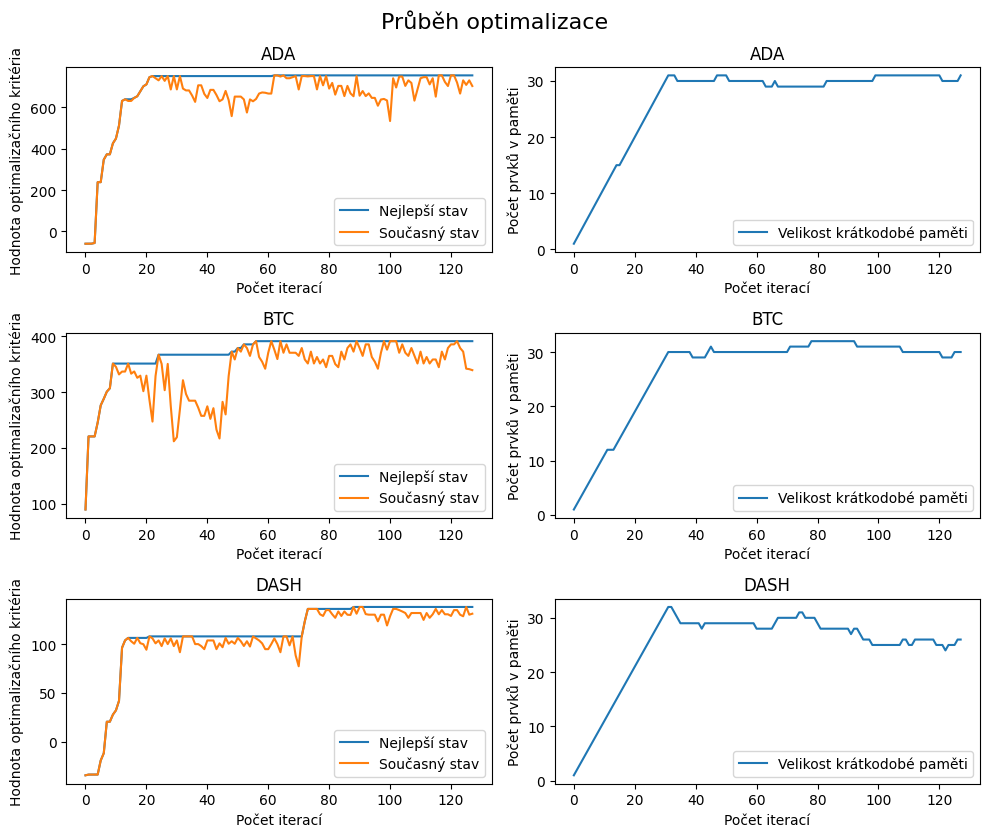

In [8]:
x_label = "Počet iterací"
best_label = "Nejlepší stav"
curr_label = "Současný stav"
mem_label = "Velikost krátkodobé paměti"

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(10, 8.5)
fig.suptitle("Průběh optimalizace", fontsize=16)

for ((fst, snd), asset_name) in zip(axs, data):
    progress = data[asset_name]
    
    fst.plot(progress[best_value_col_name], label=best_label)
    fst.plot(progress[curr_value_col_name], label=curr_label)
    fst.set_xlabel(x_label)
    fst.set_ylabel("Hodnota optimalizačního kritéria");
    fst.set_title(asset_name)
    fst.legend();
    
    snd.plot(progress[mem_size_col_name], label=mem_label)
    snd.set_title(asset_name)
    snd.set_xlabel(x_label)
    snd.set_ylabel("Počet prvků v paměti")
    snd.legend()

fig.tight_layout()

In [10]:
report_dir = "./data/report"
optimizer_dir = os.path.join(report_dir, optim_name)

if not os.path.exists(optimizer_dir):
    os.makedirs(optimizer_dir)
    
progress_path = os.path.join(optimizer_dir, set_name+"-progress.png")
fig.savefig(progress_path, bbox_inches='tight', dpi=200)